# Predicting Offensive Play-Calling in the NFL

Which statement holds true: _"defense wins championships"_ or _"the best offense is  "_

![Andy Clayton-King/Associated Press](https://img.bleacherreport.net/img/slides/photos/004/244/466/hi-res-d556c426fbf9d915a238a582d78e6abb_crop_exact.jpg?h=533&w=800&q=70&crop_x=center&crop_y=top "Andy Clayton-King/Associated Press")


### Background
So therefore, this bring us to the objective of this project. We will be utilizing machine learning to build several models to predict play type calls. The modeling techniques will be based off of the situaltional and deiscreate nature of football plays where we will work to correlate varoius features in each play with the acknowledgement that each data point can be either dependent or independent. 

Narative: https://dspace.mit.edu/bitstream/handle/1721.1/113120/1016455954-MIT.pdf?sequence=1


### Overview
In this notebook, we will walkthrough solving a complete mahcine leanring problem using the NFL dataset. Our notebook objective is as follows:

  ___Use the provided NFL data (and additional sources where necessary) to developl a model that can predict a NFL play type call, and then interpret the results to find the variables that are most predictive to the score.___      


This is a supervised, classification machine learning taks: given a set of data with targets (in this case play calls) included, we want to train a model that can learn to map the features (also known as explanatory variables) to the target. 
* __Supervised problem__: we are given both the features and the target
* __Classification problem__: the target has labels that we are trying to predict (oppose to a regression prblme where we are trying to predict the quanity)

### Getting Started
To get started, we will need to: Download the NFL data from [nflscrapR-data](https://github.com/ryurko/nflscrapR-data). We mainly use the [nlf_season_pbp dataset](https://github.com/ryurko/nflscrapR-data/tree/master/data/season_play_by_play). 

__Regular Season Totals, Playoffs not included__

## Data Import

We will use the standard data science and machine learning libraries: numpy, pandas and scikit-learn, with matplotlib and seaborn for visualization. 

In [61]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 120 columns of a dataframe
pd.set_option('display.max_columns', 120)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
#plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
#sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

## Data Cleaning and Formatting

### Load in the Data and Examine
First we will load out data into a pandas dataframe and perform some qick visualizations. 

In [10]:
# import nfl season play by play data
nfl = pd.read_csv('nfl_season_pbp.csv')

# Display bottom of dataframe (specifcally on America's team: Dallas Cowboys)
nfl[nfl.posteam=='DAL'].tail()

/home/redne/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (26,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,GameID,play_id,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
407683,2012-12-30,2012123007,3637,22,4,NaN,01:09,2,69.0,0.0,WAS,35.0,35.0,0,0,0.0,NaN,DAL,WAS,K.Forbath kicks 59 yards from WAS 35 to DAL 6....,1,20,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,D.Harris,NaN,C.Wilson,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.702720,0.048047,0.003351,0.034880,0.111059,0.000459,0.099483,0.0,0.0,0.635472,0.192438,NaN,NaN,0.984384,0.015616,0.985743,0.014257,0.015616,-0.001359,NaN,NaN,2012
407684,2012-12-30,2012123007,3659,22,4,1.0,01:02,2,62.0,7.0,DAL,26.0,74.0,10,4,0.0,0.0,DAL,WAS,(1:02) (Shotgun) T.Romo pass short middle to F...,1,4,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Romo,00-0021678,1,Complete,Short,1,3,0,middle,0,NaN,NaN,None,0,NaN,NaN,F.Jones,00-0026162,1,NaN,NaN,NaN,J.Wilson,S.Bowen,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.676691,0.044547,0.002162,0.032302,0.128912,0.000490,0.114896,0.0,0.0,0.827910,-0.054144,-0.172892,0.118748,0.985743,0.014257,0.988452,0.011548,0.014257,-0.002710,-0.002032,-0.000678,2012
407685,2012-12-30,2012123007,3687,22,4,2.0,00:40,1,40.0,22.0,DAL,30.0,70.0,6,9,0.0,0.0,DAL,WAS,"(:40) (No Huddle, Shotgun) T.Romo pass short r...",1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Romo,00-0021678,1,Complete,Short,2,3,0,right,0,NaN,NaN,None,0,NaN,NaN,J.Hanna,00-0029634,1,NaN,NaN,NaN,J.Wilson,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.689524,0.044315,0.001826,0.031873,0.122792,0.000518,0.109152,0.0,0.0,0.773766,0.176164,-0.124669,0.300833,0.988452,0.011548,0.932941,0.067059,0.011548,0.055511,0.002206,0.053305,2012
407686,2012-12-30,2012123007,3711,22,4,3.0,00:15,1,15.0,25.0,DAL,35.0,65.0,1,16,0.0,0.0,DAL,WAS,"(:15) (No Huddle, Shotgun) T.Romo pass short m...",1,7,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Romo,00-0021678,1,Complete,Short,5,2,0,middle,0,NaN,NaN,None,0,NaN,NaN,J.Hanna,00-0029634,1,NaN,NaN,NaN,P.Riley,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.686712,0.040447,0.001428,0.028126,0.107493,0.000404,0.135389,0.0,0.0,0.949931,0.000000,0.270577,-0.270577,0.932941,0.067059,1.000000,0.000000,0.067059,-0.067059,-0.065616,-0.001442,2012
407687,2012-12-30,2012123007,3735,22,4,NaN,00:00,0,0.0,15.0,DAL,35.0,35.0,0,16,0.0,0.0,DAL,WAS,END GAME,1,0,0,0,NaN,NaN,NaN,0,0,NaN,End of Game,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,-10.0,NaN,WAS,DAL,0,None,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000004,0.000000,NaN,NaN,2012


In [3]:
#Listing of play types
nfl.PlayType.unique()

array(['Kickoff', 'Pass', 'Run', 'Extra Point', 'Punt', 'No Play',
       'Timeout', 'Sack', 'Quarter End', 'Field Goal',
       'Two Minute Warning', 'QB Kneel', 'End of Game', 'Spike',
       'Half End'], dtype=object)

create function to only select offensive important plays

In [4]:
def play_type_match(plays):
    play_types = [
        'Field Goal',
        'Pass',
        'Run',
        #'QB Kneel', #Should add this back in 
        'Punt'
    ]
    return plays in play_types

In [6]:
# include only import offensive plays
nfl = nfl[nfl.PlayType.map(play_type_match)]
nfl = nfl[pd.notnull(nfl.posteam)]

Plot the distribution among plays with seaborn countplot. 

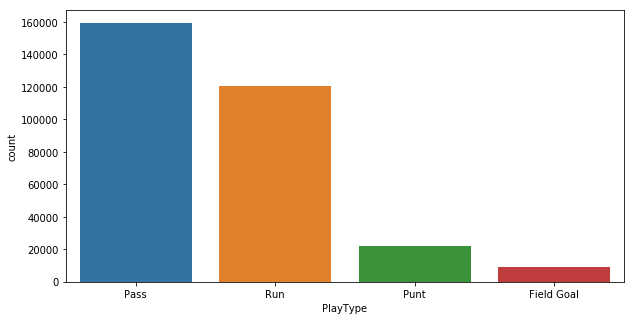

In [7]:
fig = plt.figure(figsize=(10,5))
# sns.countplot(nfl['PlayType'], label='Count') # this includes all Plays
sns.countplot(nfl.PlayType, label='Count')

The next plot shows the distribution between the difference in Score (y) spread across each quarter for each play type (except QB Kneel). This is especially interesting. We can see that if a team is in the fourth quarter, there are two vast extremes:
1. if the team is down, it is very likely the team would pass the ball (naturally to score more points)
2. if the team is not dowm, it is very likely the team would run the ball (naturally to run out the clock)

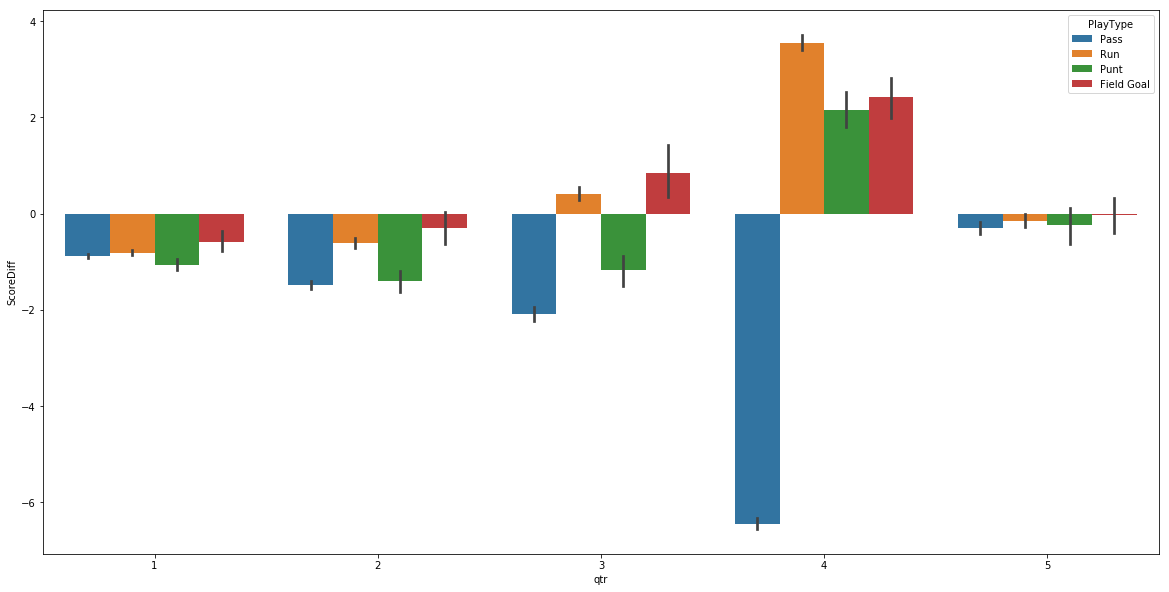

In [8]:
plt.figure(figsize=(20,10))
sns.barplot(x="qtr", y="ScoreDiff", hue="PlayType", data=nfl);

## NFL Statistics

After loading the dataframe that contains each NFL game play by play information, we add additional metrics based off of background knowledge of the NFL game. Metrics that come to mind that initally/assumabily would have some impact on predicting the next play would be attributes such as: 
* Score difference
* Distance from 1st down
* Turnover distribution
* Pass/Rush success measures

__Note__: if you want to read on the base metrics used in this data set such as EPA (expected points added) and WPA (Win Probability Added), take a look at [ryurko](http://www.stat.cmu.edu/~ryurko/pdf/greatlakes_2017.pdf) that describes in more detail the evaluation used. 

In [14]:
def pass_completion_mapper(row):
    if row.PassOutcome == 'Incomplete Pass':
        if row.InterceptionThrown == 1:
            return 'Interception'
        else:
            return 'Incomplete'
    else:
        return 'Complete'

In [29]:
nfl_df = nfl
# only keep run and pass
nfl_df = nfl_df[(nfl_df.PlayType == 'Run') | (nfl_df.PlayType == 'Pass')]

# Pass Game Stats
nfl_df.PassOutcome = nfl_df.apply(pass_completion_mapper,axis=1)
nfl_df['PassComplete'] = np.where(nfl_df.PassOutcome=='Complete', 1, 0)
nfl_df['ReceiveYrdLine100'] = nfl_df.yrdline100 - nfl_df.AirYards
nfl_df['CompPct'] = nfl_df.PassComplete / nfl_df.PassAttempt
nfl_df['PassYPA'] = nfl_df['Yards.Gained']  / nfl_df.PassAttempt # passing yards per attempt
nfl_df['YPComp'] = nfl_df['Yards.Gained']  / nfl_df.PassComplete     # Yards Per Completion
nfl_df['PassTDPct'] = nfl_df.Touchdown / nfl_df.PassAttempt    # Percentatge of pass attempts that resulted in a touchdown
nfl_df['IntPct'] = nfl_df.InterceptionThrown / nfl_df.PassAttempt  # Interception Percentage
nfl_df['HitPct'] = nfl_df.QBHit / nfl_df.PassAttempt # Times Hit per Pass Attempt
nfl_df['PassFumblePct'] = nfl_df.Fumble / nfl_df.PassAttempt


# Run Game Stats
nfl_df['YPC'] = nfl_df['Yards.Gained']  / nfl_df.RushAttempt   # Yards Per Carry
nfl_df['RunSRate'] = nfl_df.RushAttempt / nfl_df.EPA   # Percentof carreis with positive EPA
nfl_df['RunEPA'] = nfl_df.EPA / nfl_df.RushAttempt # EPA per reception
nfl_df['RunTDPct'] = nfl_df.Touchdown / nfl_df.RushAttempt  # TDs per carry
nfl_df['RunFumblePct'] = nfl_df.Fumble / nfl_df.RushAttempt  # Fumbles per carry


# In Game Metrics
### indicators if the team with the ball is in FG Range and/or RedZone
nfl_df['FGRange'] = nfl_df['yrdline100'] <= 38
nfl_df['RedZone'] = nfl_df['yrdline100'] <= 20

Create distance to go groupings based on the number of yards a team needs to gain a first down.

In [30]:
def dist1(y):
    if y < 4:
        return 'short'
    elif y < 8:
        return 'medium'
    elif y < 12:
        return 'long'
    else:
        return 'very long'

In [31]:
nfl_df['dist_to_1st'] = [dist1(yd) for yd in nfl_df.ydstogo.values]

Make some new indicator columns, including the response variable (if the play is a pass), if the team is in Field Goal range, in the Red Zone, in the last 3 minutes of the half, and indiciators for down and quarter.

Also, create two more indicators, one if the previous play for the team with the ball was a pass or run, and the other if it is the first play of a new drive. If it is the first play of the drive, then assign a 0 to the indicator for the previous play for the team being a pass

In [32]:
nfl_df["RESP"] = np.where(nfl_df.PlayType=='Pass', 1, 0)
nfl_df["FGRange"] = nfl_df.FGRange*1.0
nfl_df["RedZone"] = nfl_df.RedZone*1.0
nfl_df["last2mH"] = (nfl_df.TimeSecs >=1620)*1.0 #2 mins warning of the half
nfl_df["down1"] = (nfl_df.down == 1.0)*1.0
nfl_df["down2"] = (nfl_df.down == 2.0)*1.0
nfl_df["down3"] = (nfl_df.down == 3.0)*1.0
nfl_df["qt1"] = (nfl_df.qtr == 1.0)*1.0
nfl_df["qt2"] = (nfl_df.qtr == 2.0)*1.0
nfl_df["qt3"] = (nfl_df.qtr == 3.0)*1.0
nfl_df["qt4"] = (nfl_df.qtr == 4.0)*1.0

Create the game number column that gives the number game in the current season for the team with the ball in each row.

In [46]:
# create consistent TeamID for matching
nfl_df['TeamGameID'] = nfl_df.GameID.map(lambda x: str(x))+nfl_df['posteam']

create two more indicators, one if the previous play for the team with the ball was a pass or run, and the other if it is the first play of a new drive. If it is the first play of the drive, then assign a 0 to the indicator for the previous play for the team being a pass.

In [50]:
# initialize the first values of prevWasPass column to 0 and StartofDrive to 1 (first play of first team's drive in data set)
nfl_df = nfl_df.sort_values(['Season','GameID','play_id','TimeSecs'])
nfl_df.loc[0,'prevWasPass'] = 0.0
nfl_df.loc[0,'StartofDrive'] = 1.0

# iterate through the rows to fill in these columns
for i in range(1,len(nfl_df)):
    # if the current row is the same game and the same team has the ball as the play above
    if (nfl_df.loc[i-1,'TeamGameID'] == nfl_df.loc[i,'TeamGameID']) & (nfl_df.loc[i-1,'posteam'] == nfl_df.loc[i,'posteam']):
        nfl_df.loc[i,'prevWasPass'] = nfl_df.loc[i-1,'RESP']*1.0
        nfl_df.loc[i,'StartofDrive'] = 0.0
    # otherwise, it is the start of a new drive
    else:
        nfl_df.loc[i,'prevWasPass'] = 0.0
        nfl_df.loc[i,'StartofDrive'] = 1.0

In [51]:
nfl_df.head(2)

,Date,GameID,play_id,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,...,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season,YPC,PassComplete,ReceiveYrdLine100,CompPct,PassYPA,YPComp,PassTDPct,IntPct,HitPct,PassFumblePct,RunSRate,RunEPA,RunTDPct,RunFumblePct,FGRange,RedZone,dist_to_1st,RESP,last2mH,down1,down2,down3,qt1,qt2,qt3,qt4,gameNum,TeamGameID,prevWasPass,StartofDrive
92869,2009-09-10,2009091000,68,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,...,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009,inf,1,61.0,1.000000,5.000000,5.0,0.0,0.0,0.0,0.0,0.00000,inf,NaN,NaN,0.0,0.0,long,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2009091000PIT,0.0,1.0
92870,2009-09-10,2009091000,92,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,Complete,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,None,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,...,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009,-3.000000,1,53.0,inf,-inf,-3.0,NaN,NaN,NaN,NaN,-0.71288,-1.402760,0.0,0.0,0.0,0.0,medium,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2009091000PIT,1.0,0.0


### Data Types and Missing Values

Check to see which columns contains NaNs. There are many data points in each column that are null..For instance. 'Down' is null bc the 2 point conversion and there is not down marker

In [36]:
nfl_df.isnull().sum(axis=0)

Date                      0
GameID                    0
play_id                   0
Drive                     0
qtr                       0
down                      0
time                      0
TimeUnder                 0
TimeSecs                  0
PlayTimeDiff             14
SideofField               0
yrdln                     0
yrdline100                0
ydstogo                   0
ydsnet                    0
GoalToGo                  0
FirstDown                 0
posteam                   0
DefensiveTeam             0
desc                      0
PlayAttempted             0
Yards.Gained              0
sp                        0
Touchdown                 0
ExPointResult        279552
TwoPointConv         279552
DefTwoPoint          279552
Safety                    0
Onsidekick                0
PuntResult           279552
                      ...  
WPA                     877
airWPA               120701
yacWPA               120966
Season                    0
YPC                 

In [35]:
# removing 2 point conversion, not really needed for this project to predict run/pass
nfl_df = nfl_df[~np.isnan(nfl_df.down)].reset_index(drop=True)

## Exploratory Data Analysis 

This is the fun part. Now that we have ingested the data, we are ready to perform our analytics operations. Before we can train our models, we need to develop a sound understanding of the data. As we can see in the last cell, our dataset is pretty noisy, we have many missing values, and a host of other discpancies. In this step we will utilize various data summarization and visualization to provide insights into the process. 

### Looking For Relationships

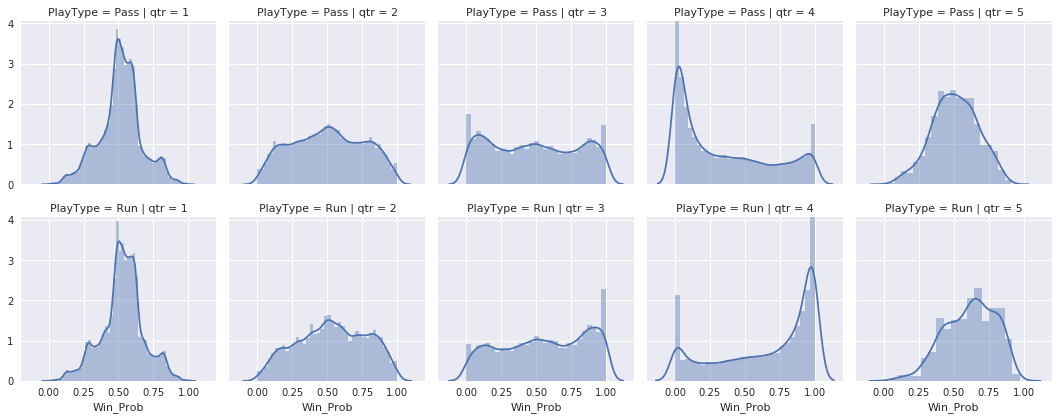

In [62]:
plt.figure(figsize=(20,20))
g = sns.FacetGrid(nfl_df, row='PlayType', col='qtr')
g.map(sns.distplot, "Win_Prob")
plt.show()

In [98]:
titlesr = []
titlesy = []
titlesp = []
xs = []
rs = []
ys = []
ps = []
sds = []
# iterate through the groupby of the dataframe by down and keep all years 2003-14
for d,df1 in nfl_df.groupby('down'):
    titlesr.append('Run Plays by Yards to First Down on Down ' + str(d))
    titlesy.append('Pass Plays by Yards to First Down on Down ' + str(d))
    titlesp.append('Passing % by Yards to First Down on Down ' + str(d))
    # create the unique list of distance to first down
    yds = sorted(df1.ydstogo.unique())
    xs.append(yds)
    # create lists of the number of run plays, pass plays, and the pass percentage (pass per runs + pass plays) by yds_to_go
    rs.append([int(df1[df1.ydstogo==y]['RushAttempt'].sum()) for y in yds])
    ys.append([int(df1[df1.ydstogo==y]['RESP'].sum()) for y in yds])
    ps.append([df1[df1.ydstogo==y]['RESP'].mean() for y in yds])

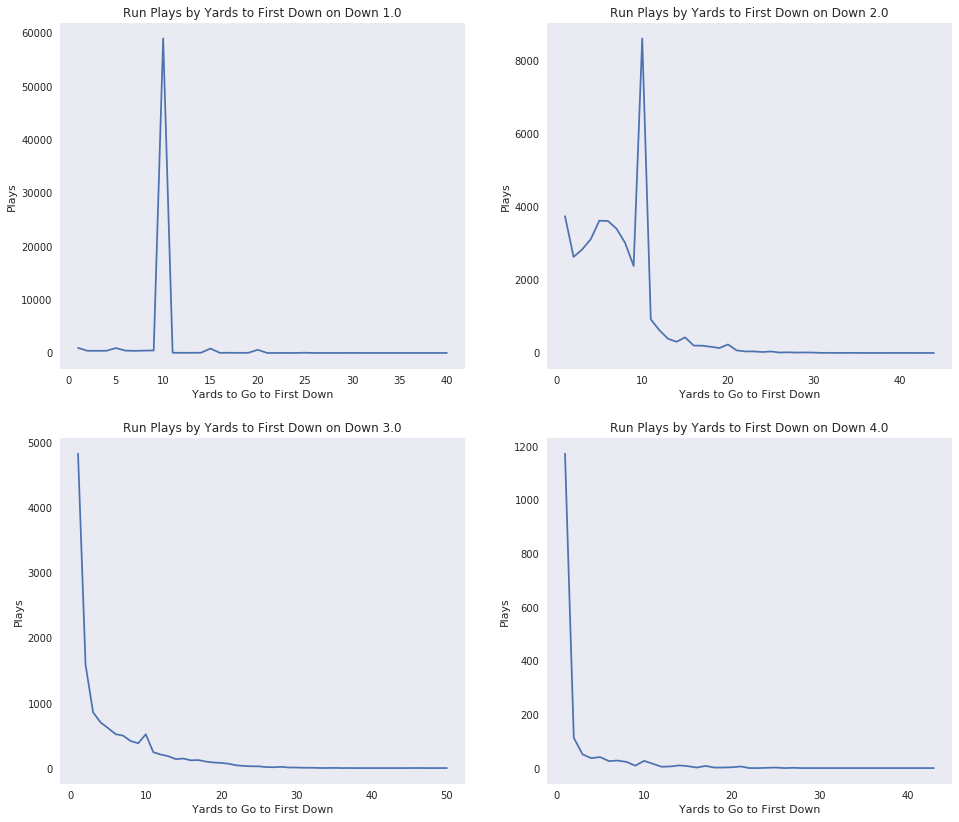

In [100]:
# create subplots for bar charts of number of running plays on each down, by yards to go to first down for 2003-14 combined
f, axarr = plt.subplots(2, 2, figsize=(16,14))
axes = axarr[0].tolist()
axes.extend(axarr[1].tolist())

for i in range(4):
    axes[i].plot(xs[i], rs[i])
    axes[i].set_title(titlesr[i])
    axes[i].set_ylabel("Plays")
    axes[i].set_xlabel("Yards to Go to First Down")
    axes[i].grid(False)
    sns.despine()

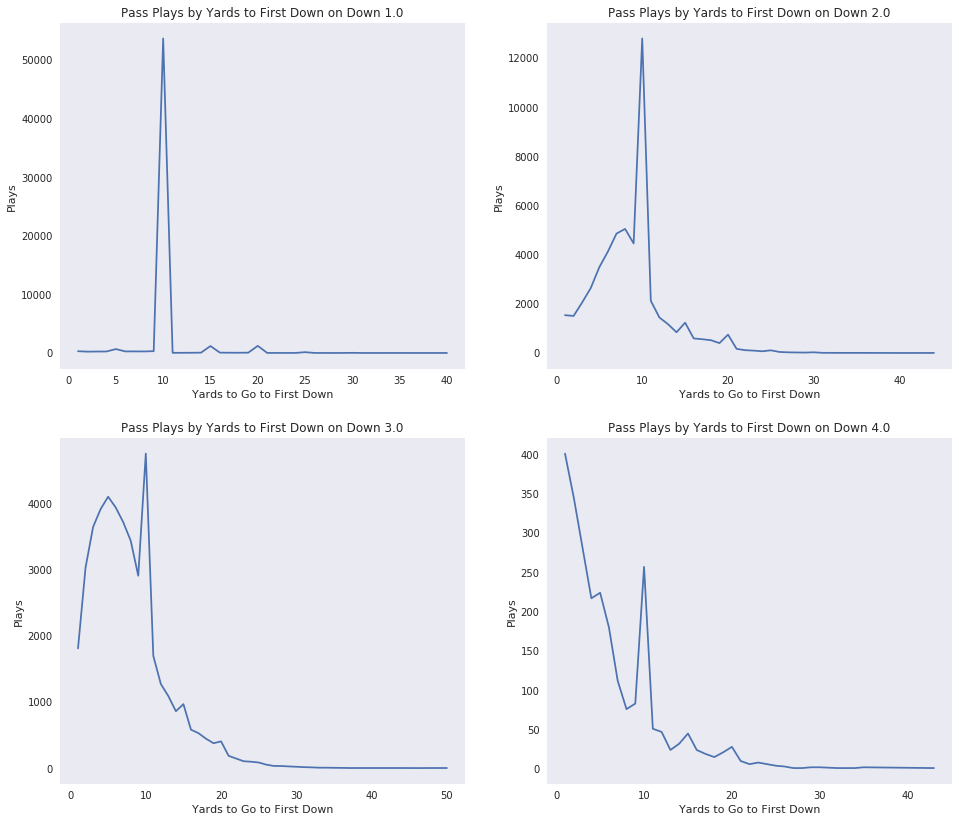

In [101]:
# create subplots for bar charts of number of passing plays on each down, by yards to go to first down
f, axarr = plt.subplots(2, 2, figsize=(16,14))
axes = axarr[0].tolist()
axes.extend(axarr[1].tolist())

for i in range(4):
    axes[i].plot(xs[i], ys[i])
    axes[i].set_title(titlesy[i])
    axes[i].set_ylabel("Plays")
    axes[i].set_xlabel("Yards to Go to First Down")
    axes[i].grid(False)
    sns.despine()

## Feature Engineering & Selection

Now that we have a solid understanding of distribution of the dataset we can now start architecting our model. There are three core steps that we will address in the process:
1. __Feature engineering__ where we create data features from the analysis performed in the previous data exploration section
2. __Model training__ where we find the model that answers our objective which is to predict NFL plays accurately. We will define the accuracy by comparing various models success metrics. 
3. __Productionize the Model__ take steps to ensure the model is ready for the real world

### Feature Selection

We now select our features and proceed to display exploratory charts for both our continuous and indicator variables. In later sections, we will feed these features into our classifiers to predict which plays the offense will run or pass the football. [Source](https://github.com/mdgoldberg/playprediction/blob/master/Some%20EDA.ipynb)

In [69]:
# Define our features
lcols = ['last2mH', 'down1', 'down2',
       'down3', 'qt1', 'qt2', 'qt3', 'qt4','FGRange','Touchdown','prevWasPass', 'StartofDrive']

In [121]:
#Define our continuous features
lcols_c = ["ScoreDiff", "ydstogo", "GoalToGo", "Win_Prob",'yrdline100','Yards.Gained',
          'ydsnet','Touchdown_Prob','down']
#FirstDown

In [122]:
#Define our indicator features
lcols_i = list(set(lcols) - set(lcols_c))

In [123]:
#Labels
lbl = ["Run", "Pass"]

/home/redne/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


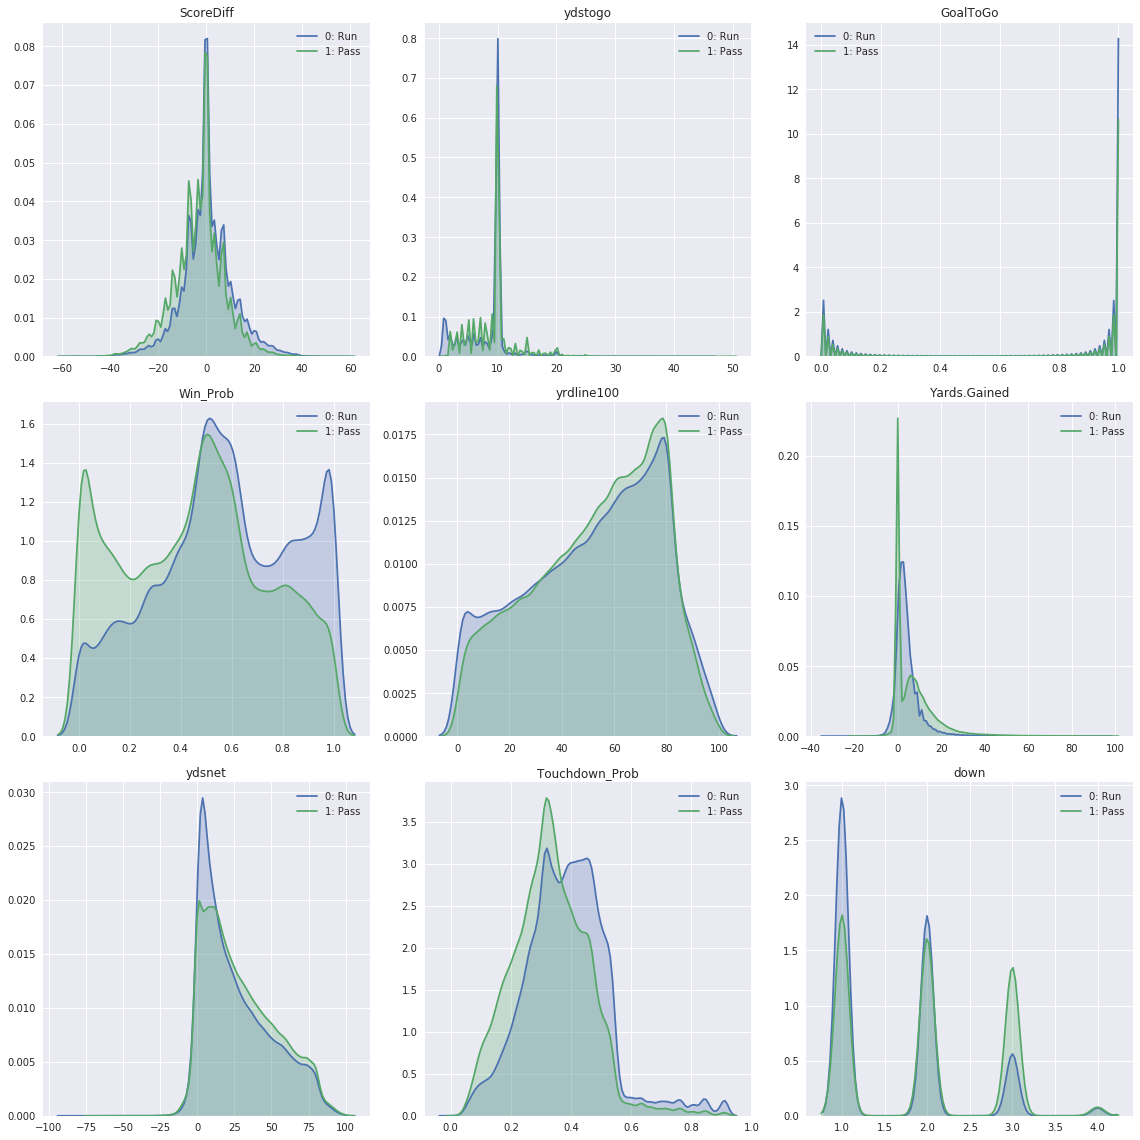

In [124]:
#Display plots of EDA on continuous variables
dfgb=nfl_df.groupby('RESP')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16), tight_layout=True)
for ax, p in zip(axes.ravel(), lcols_c):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+": "+lbl[int(k)], shade=True)
        sns.despine()
        ax.set_title(p)
        ax.legend(loc='best')

#### Intepretation of continuous features

In order to look at the effect of categorical variable on classification, we plot out various distributions that distringuished between pass and run. Some interesting features come very apparent such as:
* The 4th plot depicting Win_Probability. This variable show sthe win probability added for each team with possession. When it is distributed over pass and run we can see when win probability is unlikely the team tends to pass, however (and naturally) if the win probability is high, the team is often to run the ball.
* The last plot where is teems it is common to run the bass on 1st down and pass the ball on 3rd down. 

###  Feature Correlation Analysis

from this point on we will be referring to the columns as 'features'. 

Pearson goes from -1 to +1. A value of 0 would have told there is no correlation, so we shouldn’t bother looking at that attribute.

At least, we have these attributes which are slightly correlated. This gives us hope that we might be able to build a meaningful predictor using these ‘weakly’ correlated features.

To start off lets create a list of features that we would like to the correlation for potenial prediction measures.

In [129]:
potentialFeatures = ['Win_Prob','yrdline100', 'ydstogo','ScoreDiff','down', 'ydsnet',
                     'last2mH', 'down1', 'down2','YPComp','Touchdown_Prob',
       'down3', 'qt1', 'qt2', 'qt3', 'qt4','FGRange','Touchdown','prevWasPass', 'StartofDrive','prevWasPass']

In [130]:
# check how the features are correlated with the overall ratings# check  

for f in potentialFeatures:
    related = nfl_df['RESP'].corr(nfl_df[f])
    print("%s: %f" % (f, related))

Win_Prob: -0.198904
yrdline100: 0.025150
ydstogo: 0.089893
ScoreDiff: -0.162304
down: 0.212178
ydsnet: 0.063383
last2mH: -0.014248
down1: -0.169469
down2: -0.006378
YPComp: 0.160144
Touchdown_Prob: -0.201691
down3: 0.213501
qt1: -0.049771
qt2: 0.043829
qt3: -0.026490
qt4: 0.030195
FGRange: -0.029498
Touchdown: 0.042382
prevWasPass: 0.064276
StartofDrive: -0.087750
prevWasPass: 0.064276


### Feature Engineer for Model

In [131]:
# Best Team Indicators to be Playoff Bound
features = nfl_df[['Touchdown_Prob',
 'down3',
 'down',
 'ydstogo',
 'Win_Prob',
 'prevWasPass']]

# what to predict
plays = nfl_df['RESP']


In [132]:
# split the data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, plays, stratify=plays, random_state=66)

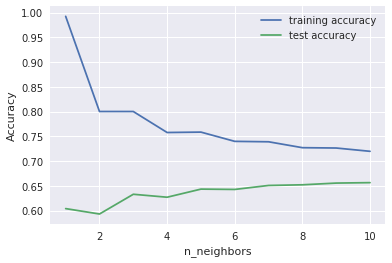

In [133]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.645
Test set score: 0.647


In [135]:
logreg100 = LogisticRegression(C=900).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.645
Test set score: 0.647


### Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.600


#### Feature Importance

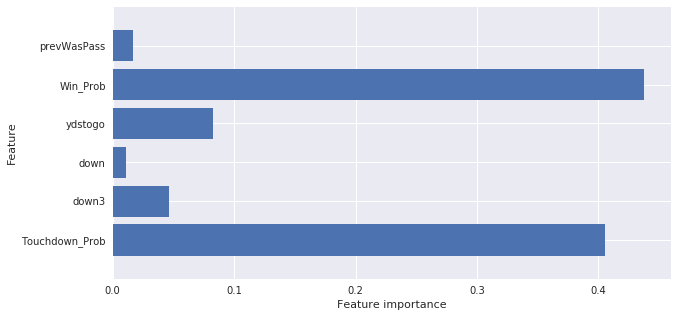

In [137]:
def plot_feature_importances(model):
    plt.figure(figsize=(10,5))
    n_features = len(model.feature_importances_)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.970
Accuracy on test set: 0.633


#### Feature Importance

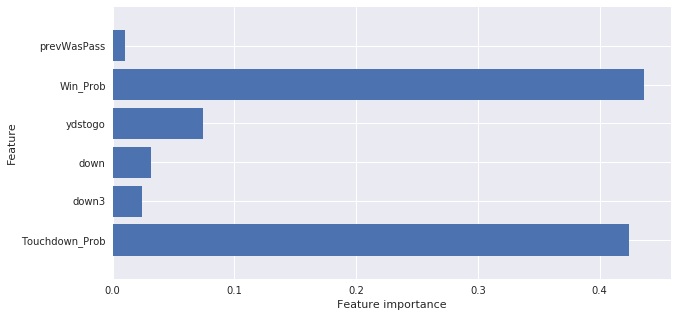

In [139]:
plot_feature_importances(rf)

### Next Steps

June 2018: There is still alot of work ahead in Feature Engineering and Selection. As observed from the accuracy scores from selected featuers, there is plenty of room for improvement. Check back later for updated on development of machine learning models and hyperparameter tuning one we appropriately select our features. 

Good Day! Feedback is always welcomed. 

### Resources

Here is a list of resources that I found helpful when developing this post.
* [Ryurko NFL scraper Expected Points Added matrics](http://www.stat.cmu.edu/~ryurko/pdf/greatlakes_2017.pdf)
* [Exploratory Data Analysis](https://github.com/mdgoldberg/playprediction/blob/master/Some%20EDA.ipynb)
* [Microsoft Machine Learning Resources](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/lifecycle-modeling)